In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [111]:
file_medals = 'Medals.csv'
df_medals = pd.read_csv(
    file_medals,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df_medals.columns

Index(['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year'], dtype='object')

     NOC  Gold  Silver  Bronze  Total
0    AFG     0       0       2      2
1    AHO     0       1       0      1
2    ALB     0       0       2      2
3    ALG     7       4       9     20
4    ANZ     3       4       5     12
..   ...   ...     ...     ...    ...
147  VEN     3       7       9     19
148  VIE     1       3       1      5
149  YUG    28      31      31     90
150  ZAM     0       1       2      3
151  ZIM     3       4       1      8

[152 rows x 5 columns]


D:\Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     NOC  Gold  Silver  Bronze  Total  Cluster
0    AFG     0       0       2      2        0
1    AHO     0       1       0      1        0
2    ALB     0       0       2      2        0
3    ALG     7       4       9     20        0
4    ANZ     3       4       5     12        0
..   ...   ...     ...     ...    ...      ...
147  VEN     3       7       9     19        0
148  VIE     1       3       1      5        0
149  YUG    28      31      31     90        0
150  ZAM     0       1       2      3        0
151  ZIM     3       4       1      8        0

[152 rows x 6 columns]


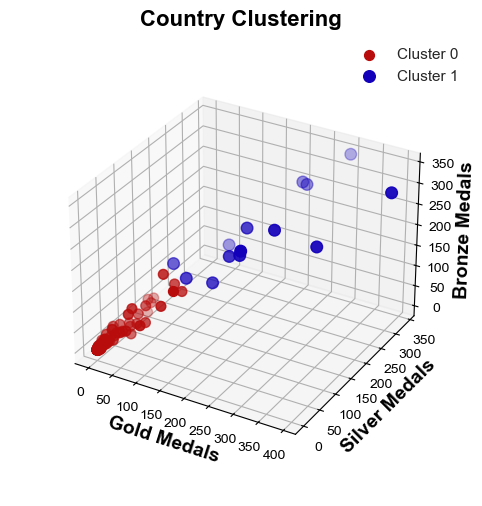

In [175]:
grouped = df_medals.groupby('NOC')[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()
print(grouped)

features = grouped[['Gold', 'Silver', 'Bronze', 'Total']]
# 标准化数据
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
grouped['Cluster'] = kmeans.fit_predict(features_scaled)

print(grouped[['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Cluster']])
# grouped = grouped[['NOC','Cluster']]
grouped = grouped[grouped['Cluster']!=2]

# 绘制三维聚类图像
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plt.style.use('seaborn-v0_8-darkgrid')  # 使用 Matplotlib 提供的兼容样式

# 定义颜色和大小
colors = ['#B80C0C', '#1200BA']
sizes = [50, 70]

# 绘制数据点
for i in range(2):
    cluster_data = grouped[grouped['Cluster'] == i]
    ax.scatter(cluster_data['Gold'], cluster_data['Silver'], cluster_data['Bronze'], 
               c=colors[i], s=sizes[i], label=f'Cluster {i}')
# 设置标签和标题
ax.set_xlabel('Gold Medals', fontsize=14, fontweight='bold')
ax.set_ylabel('Silver Medals', fontsize=14, fontweight='bold')
ax.set_zlabel('Bronze Medals', fontsize=14, fontweight='bold')
ax.set_title('Country Clustering', fontsize=16, fontweight='bold')

# 添加图例
ax.legend(fontsize=11)
# 手动调整布局
# plt.subplots_adjust(left=0.1, right=1, bottom=1, top=1)
# plt.tight_layout()
ax.set_box_aspect(aspect=None, zoom=0.85)
plt.savefig("fig/Countrty_Cluster.png")
# 显示图表
plt.show()

In [72]:
file_countries = 'Countries.csv'
df_countries = pd.read_csv(
    file_countries,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df_countries = df_countries[['NOC']]
df_countries['Cluster'] = 0  ##或者分为-1类？？
missing_noc = df_countries[~df_countries['NOC'].isin(grouped['NOC'])]
missing_noc['NOC'].to_csv("NoMedal_Country.csv")
final = pd.concat([grouped, missing_noc])
final[final['Cluster']==2]['Cluster'] = 1
final.to_csv("CountryType.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19724\3987111502.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[final['Cluster']==2]['Cluster'] = 1


In [91]:
file = 'data4Supervised(1).csv'
df = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore',  # 忽略解码错误
    index_col=None
)
file = 'CountryType.csv'
type = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore',  # 忽略解码错误
    index_col=None
)
merged = pd.merge(df, type, on='NOC', how='left')
merged.columns = ['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year',
       'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Past_Total', 'Events_Count',
       'Sports_Count', 'isHoster', 'Unnamed: 0_y', 'Country_Type']
merged = merged[['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year',
       'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Past_Total', 'Events_Count',
       'Sports_Count', 'isHoster', 'Country_Type']]
merged.to_csv("data4Supervised_withType.csv")

In [41]:
file = 'data/summerOly_athletes.csv'
df = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore',  # 忽略解码错误
    index_col=None
)
file = 'gmmAthleteClusterSummary.csv'
type = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore',  # 忽略解码错误
    index_col=None
)
type = type[['Name','Sex','Final Score','Cluster']]
merged = pd.merge(df, type, on=['Name','Sex'], how='left')

# 按 NOC 和 Year 进行分组并计算 Final Score 的总和
score_sum = merged.groupby(['NOC', 'Year'])['Final Score'].sum().reset_index()
# 按 NOC 和 Year 进行分组并计算 Cluster 的类别数量
cluster_counts = merged.groupby(['NOC', 'Year'])['Cluster'].value_counts().unstack(fill_value=0).reset_index()
# 合并两个结果
result = pd.merge(score_sum, cluster_counts, on=['NOC', 'Year'])
result.columns = ['NOC','Year','Ath_Score','Ath_Type0','Ath_Type1','Ath_Type2']
result['Good_Ath_Ratio'] = result['Ath_Type0']/(result['Ath_Type0']+result['Ath_Type1']+result['Ath_Type2'])
result = result[['NOC','Year','Ath_Score','Good_Ath_Ratio']]
result

,NOC,Year,Ath_Score,Good_Ath_Ratio
0,AFG,1936,0.761126,1.000000
1,AFG,1948,2.061386,1.000000
2,AFG,1956,1.236477,1.000000
3,AFG,1960,2.040435,1.000000
4,AFG,1964,1.237189,1.000000
...,...,...,...,...
3217,ZIM,2008,114.118618,0.625000
3218,ZIM,2012,84.899731,0.333333
3219,ZIM,2016,62.993872,0.838710
3220,ZIM,2020,1.259820,1.000000


In [93]:
file = 'data4Supervised_withType.csv'
data = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore',  # 忽略解码错误
    index_col=None
)
merged = pd.merge(data, result, on=['NOC','Year'], how='left')
merged

,Unnamed: 0,NOC,Gold,Silver,Bronze,Total,Year,Past_Gold,Past_Silver,Past_Bronze,Past_Total,Events_Count,Sports_Count,isHoster,Country_Type,Ath_Score,Good_Ath_Ratio
0,0,AFG,0.0,0.0,0.0,0.0,1936,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0,0.761126,1.000000
1,1,AFG,0.0,0.0,0.0,0.0,1948,0.0,0.0,0.0,0.0,25.0,25.0,0.0,0,2.061386,1.000000
2,2,AFG,0.0,0.0,0.0,0.0,1956,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0,1.236477,1.000000
3,3,AFG,0.0,0.0,0.0,0.0,1960,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0,2.040435,1.000000
4,4,AFG,0.0,0.0,0.0,0.0,1964,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0,1.237189,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,ZIM,1.0,3.0,0.0,4.0,2008,1.0,1.0,1.0,3.0,16.0,16.0,0.0,0,114.118618,0.625000
3224,3224,ZIM,0.0,0.0,0.0,0.0,2012,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0,84.899731,0.333333
3225,3225,ZIM,0.0,0.0,0.0,0.0,2016,0.0,0.0,0.0,0.0,31.0,31.0,0.0,0,62.993872,0.838710
3226,3226,ZIM,0.0,0.0,0.0,0.0,2020,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0,1.259820,1.000000


In [95]:
merged.columns

Index(['Unnamed: 0', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year',
       'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Past_Total', 'Events_Count',
       'Sports_Count', 'isHoster', 'Country_Type', 'Ath_Score',
       'Good_Ath_Ratio'],
      dtype='object')

In [97]:
print(len(merged[merged['Year']==2024]))

206


In [99]:
test = merged[merged['Year']==2024]
test['Year'] = 2028
test['Past_Bronze'] = test['Bronze']
test['Past_Gold'] = test['Gold']
test['Past_Silver'] = test['Silver']
test['Past_Total'] = test['Past_Bronze']+test['Past_Gold']+test['Past_Silver']
test['Bronze'] = 0
test['Gold'] = 0
test['Silver'] = 0
test['Total'] = 0
print(test)
total = pd.concat([merged, test], axis=0, ignore_index=True)
print(total)
total['Ath_Score'] = total.groupby('NOC')['Ath_Score'].shift(1)
total['Good_Ath_Ratio'] = total.groupby('NOC')['Good_Ath_Ratio'].shift(1)
print(total)
total = total[['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year',
       'Past_Gold', 'Past_Silver', 'Past_Bronze', 'Past_Total', 'Events_Count',
       'Sports_Count', 'isHoster', 'Country_Type', 'Ath_Score', 'Good_Ath_Ratio']]
total.to_csv("data4Supervised_withType_Ath.csv")

      Unnamed: 0  NOC  Gold  Silver  Bronze  Total  Year  Past_Gold  \
15            15  AFG     0       0       0      0  2028        0.0   
29            29  AIN     0       0       0      0  2028        0.0   
39            39  ALB     0       0       0      0  2028        0.0   
54            54  ALG     0       0       0      0  2028        2.0   
67            67  AND     0       0       0      0  2028        0.0   
...          ...  ...   ...     ...     ...    ...   ...        ...   
3150        3150  VIE     0       0       0      0  2028        0.0   
3160        3160  VIN     0       0       0      0  2028        0.0   
3178        3178  YEM     0       0       0      0  2028        0.0   
3212        3212  ZAM     0       0       0      0  2028        0.0   
3227        3227  ZIM     0       0       0      0  2028        0.0   

      Past_Silver  Past_Bronze  Past_Total  Events_Count  Sports_Count  \
15            0.0          0.0         0.0           7.0           7.0   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16636\2533172804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year'] = 2028
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16636\2533172804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Past_Bronze'] = test['Bronze']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16636\2533172804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [101]:
total.columns

Index(['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year', 'Past_Gold',
       'Past_Silver', 'Past_Bronze', 'Past_Total', 'Events_Count',
       'Sports_Count', 'isHoster', 'Country_Type', 'Ath_Score',
       'Good_Ath_Ratio'],
      dtype='object')